Скачайте сырые данные о поездках жёлтого такси с сайта TLC: <a href="http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml" rel="nofollow noopener noreferrer" target="_blank">www.nyc.gov/html/tlc/html/about/trip_record_data.shtml</a></p>

<p>Поездки зелёного такси и лимузинов нас не интересуют!</p>

<p>Данные выложены в файлах по месяцам. Скачайте так много данных жёлтого такси, как сможете; чем больше вы будете использовать данных, тем точнее получатся ваши прогнозы. Если вы решите использовать не все данные, а только часть, выбирайте её по времени с конца. Абсолютный минимум необходимых данных — 6 месяцев: один, последний месяц, вам понадобится для тестирования, предшествующие 5 — для обучения. По 5 месяцам можно построить прогнозы, учитывающие дневную и недельную сезонности, но в данных есть и годовая. Чтобы её учесть, необходимы данные как минимум за 2 года.</p>

<p>Обработайте сырые данные по следующей схеме.</p>

<ol>
	<li>Почистите данные от ошибок и аномалий.</li>
	<li>Отбросьте минуты и секунды во времени начала поездки.</li>
	<li>Нью-Йорк вписан в прямоугольник от -74.25559 до -73.70001 градусов долготы и от 40.49612 до 40.91553 широты. Разбейте этот прямоугольник на 2500 одинаковых прямоугольных областей — по 50 интервалов вдоль каждой оси.</li>
	<li>Посчитайте количество поездок за каждый час из каждой области. Не забудьте, что если в сырых данных для какой-то пары час-область нет ни одной записи, то в агрегированных данных для неё должен стоять 0.</li>
</ol>

<p>В дальнейшем, когда вы будете предсказывать получившиеся ряды, нужно будет загружать ваши прогнозы на kaggle, поэтому нужно, чтобы идентификаторы ячеек были определены однозначно. В следующем файле даны идентификаторы ячеек, которые вам нужно использовать, и географические координаты их границ:</p>

<p><a href="https://stepik.org/media/attachments/lesson/90609/_5fd0fb3db5dfaaafa4d9fc4c00dd5ea8_regions.csv" rel="nofollow noopener noreferrer" title="Link: https://d3c33hcgiwev3.cloudfront.net/_5fd0fb3db5dfaaafa4d9fc4c00dd5ea8_regions.csv?Expires=1535846400&amp;Signature=FcOzjtppf2XuEVgyXs5Is7fOuqWFnm7upAzgSHJBc0FGTVCPNAcHbd9Y-QKAK5R6FtHwandakSLGz6PWuSElFgRJ~VKrnvv9zxnxfAtcj~GaOqxJAGHkyejs5GEiZ1tCresq~zjGIXVJZUsrtUyBMIqCWdXgAduk8fYRRedzxcU_&amp;Key-Pair-Id=APKAJLTNE6QMUY6HBC5A">regions.csv</a><br>
﻿</p>

<p>Для сдачи задания этой недели вам нужно агрегировать только данные за май 2016, но, когда задание будет сдано, не забудьте запустить ваш агрегирующий скрипт на всех остальных месяцах, которые вы собираетесь использовать при прогнозировании.</p>

<p>Чтобы сдать задание, выполните следующую последовательность действий.</p>

<p>1. Загрузите данные за май 2016 года.</p>

<p>2. Проведите фильтрацию: удалите поездки с</p>

<ul>
	<li>нулевой длительностью</li>
	<li>нулевым количеством пассажиров</li>
	<li>нулевым расстоянием поездки по счётчику</li>
	<li>координатами начала, не попадающими в прямоугольник Нью-Йорка</li>
</ul>

<p>Можно придумать ещё какие-то критерии для фильтрации данных; тем не менее, не стоит применять дополнительные фильтры: начиная с четвёртой недели вам предстоит сравнивать качество ваших прогнозов с качеством прогнозов других слушателей, и, чтобы это сравнение было корректным, нужно, чтобы данные у всех были предобработаны одинаково.</p>

<p>3. Агрегируйте данные за май 2016 года по часам и областям (можно использовать функцию stats.binned_statistic_2d, с которой вы сталкивались в заданиях четвёртого курса). Не забудьте проверить, что идентификаторы, которые вы присваиваете ячейкам, соответствуют приложенному выше файлу.</p>

<p>4. Выведите первые строки полученной таблицы с указанием времени, идентификатора зоны и количества поездок.</p>

<p>5. Постройте график количества поездок жёлтого такси из ячейки, содержащей Empire State Building.</p>

<p>6. Посчитайте, сколько в мае 2016 было пар час-ячейка, для которых не было совершено ни одной поездки.</p>

<p>7. Загрузите ноутбук в форму ниже</p>

1. Загрузите данные за май 2016 года.

In [25]:
import pandas as pd

In [26]:
path_for_data = "/storage/data/"

In [27]:
may_2016_data_path = path_for_data + "/2016/" + "yellow_tripdata_2016-05.csv"
may_2016_data = pd.read_csv(may_2016_data_path)
may_2016_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


In [28]:
may_2016_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11836853 entries, 0 to 11836852
Data columns (total 19 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID               int64
store_and_fwd_flag       object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


<p>2. Проведите фильтрацию: удалите поездки с</p>

<ul>
	<li>нулевой длительностью</li>
	<li>нулевым количеством пассажиров</li>
	<li>нулевым расстоянием поездки по счётчику</li>
	<li>координатами начала, не попадающими в прямоугольник Нью-Йорка</li>
</ul>

In [29]:
# удаляем поездки с 0-ой длительностью
import datetime as dt
may_2016_data['tpep_pickup_datetime'] = may_2016_data['tpep_pickup_datetime'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
may_2016_data['tpep_dropoff_datetime'] = may_2016_data['tpep_dropoff_datetime'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
may_2016_data = may_2016_data[((may_2016_data.tpep_dropoff_datetime - may_2016_data.tpep_pickup_datetime) > dt.timedelta(0))]

In [30]:
# удаляем поездки с 0-ым количеством пассажиров
may_2016_data = may_2016_data[may_2016_data.passenger_count > 0]

In [31]:
# удаляем поездки с нулевым расстоянием поездки по счётчику
may_2016_data = may_2016_data[may_2016_data.trip_distance > 0]

In [32]:
# удаляем те поездки, которые начинаются не внутри Нью-Йорка
nyc_longitude_west = -74.25559
nyc_longitude_east = -73.70001
nyc_latitude_north = 40.91553
nyc_latitude_south = 40.49612
may_2016_data = may_2016_data[(may_2016_data.pickup_latitude < nyc_latitude_north) & (may_2016_data.pickup_latitude > nyc_latitude_south) &
                              (may_2016_data.pickup_longitude < nyc_longitude_east) & (may_2016_data.pickup_longitude > nyc_longitude_west)]

In [33]:
may_2016_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11626521 entries, 0 to 11836841
Data columns (total 19 columns):
VendorID                 int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID               int64
store_and_fwd_flag       object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: datetime64[ns](2), float64(12), int64(4), object(1)
memory usage: 1.7+ GB


<p>3. Агрегируйте данные за май 2016 года по часам и областям (можно использовать функцию stats.binned_statistic_2d, с которой вы сталкивались в заданиях четвёртого курса). Не забудьте проверить, что идентификаторы, которые вы присваиваете ячейкам, соответствуют приложенному выше файлу.</p>

In [34]:
# прочитаем метки регионов
import numpy as np
regions = pd.read_csv("regions.csv", sep=";")
regions.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [115]:
def trips_in_region(x, y, ny_lon_west, ny_lon_east, ny_lat_north, ny_lat_south):
    from scipy import stats
    counts = stats.binned_statistic_2d(x, y, None, statistic='count', bins = 50, range=[[ny_lon_west, ny_lon_east], [ny_lat_south, ny_lat_north]])
    return counts

In [100]:
def hours_in_months(date):
    now_date = date.replace(day = 1, hour = 0, minute = 0, second = 0)
    target_month = now_date.month
    now_month = now_date.month
    res_list = []
    while now_month == target_month:
        res_list.append(now_date.strftime('%Y-%m-%d %H:%M:%S'))
        now_date = now_date + dt.timedelta(hours=1)
        now_month = now_date.month
    return res_list

In [49]:
may_2016_data['tpep_pickup_datetime'] = may_2016_data['tpep_pickup_datetime'].apply(lambda dt: dt.replace(minute=0, second=0, microsecond=0))
may_2016_data['tpep_pickup_datetime'] = may_2016_data['tpep_pickup_datetime'].apply(lambda x: dt.datetime.strftime(x,'%Y-%m-%d %H:%M:%S'))
may_2016_data['tpep_dropoff_datetime'] = may_2016_data['tpep_dropoff_datetime'].apply(lambda x: dt.datetime.strftime(x,'%Y-%m-%d %H:%M:%S'))

In [51]:
may_2016_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11626521 entries, 0 to 11836841
Data columns (total 19 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID               int64
store_and_fwd_flag       object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [118]:
date = dt.datetime.strptime(may_2016_data['tpep_pickup_datetime'][0], '%Y-%m-%d %H:%M:%S')
hours = hours_in_months(date)
for hour in hours:
    values = np.zeros((regions.shape[0],))
    regions[hour] = values
    
for hour in may_2016_data['tpep_pickup_datetime'].unique():
    h = may_2016_data[may_2016_data['tpep_pickup_datetime'] == hour]
    x = np.array(h['pickup_longitude'])
    y = np.array(h['pickup_latitude'])
    regions[hour] = trips_in_region(x, y,
                                           nyc_longitude_west,
                                           nyc_longitude_east,
                                           nyc_latitude_north,
                                           nyc_latitude_south).statistic.ravel()

In [121]:
regions.shape

(2500, 749)

<p>4. Выведите первые строки полученной таблицы с указанием времени, идентификатора зоны и количества поездок.</p>

In [123]:
regions.head(10)

,region,west,east,south,north,2016-05-01 00:00:00,2016-05-01 01:00:00,2016-05-01 02:00:00,2016-05-01 03:00:00,2016-05-01 04:00:00,...,2016-05-31 14:00:00,2016-05-31 15:00:00,2016-05-31 16:00:00,2016-05-31 17:00:00,2016-05-31 18:00:00,2016-05-31 19:00:00,2016-05-31 20:00:00,2016-05-31 21:00:00,2016-05-31 22:00:00,2016-05-31 23:00:00
0,1,-74.25559,-74.244478,40.496120,40.504508,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,-74.25559,-74.244478,40.504508,40.512896,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,-74.25559,-74.244478,40.512896,40.521285,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,-74.25559,-74.244478,40.521285,40.529673,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,-74.25559,-74.244478,40.529673,40.538061,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,-74.25559,-74.244478,40.538061,40.546449,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,-74.25559,-74.244478,40.546449,40.554837,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,-74.25559,-74.244478,40.554837,40.563226,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,-74.25559,-74.244478,40.563226,40.571614,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,-74.25559,-74.244478,40.571614,40.580002,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
# у меня получилось, что первые 10 строк не содержат поездок
columns_indxs = list(range(len(regions.columns)))[5:]
np.unique(regions[regions.columns[columns_indxs]].head(10))

array([0.])

<p>5. Постройте график количества поездок жёлтого такси из ячейки, содержащей Empire State Building.</p>

In [161]:
# ищем строку для Empire State Building
longitude = -73.985428
latitude = 40.748817
row_empire_state_building = regions[(regions.west <= longitude) & 
              (regions.east >= longitude) & 
              (regions.south <= latitude) & 
              (regions.north >= latitude)]
row_empire_state_building.head()

,region,west,east,south,north,2016-05-01 00:00:00,2016-05-01 01:00:00,2016-05-01 02:00:00,2016-05-01 03:00:00,2016-05-01 04:00:00,...,2016-05-31 14:00:00,2016-05-31 15:00:00,2016-05-31 16:00:00,2016-05-31 17:00:00,2016-05-31 18:00:00,2016-05-31 19:00:00,2016-05-31 20:00:00,2016-05-31 21:00:00,2016-05-31 22:00:00,2016-05-31 23:00:00
1230,1231,-73.988912,-73.9778,40.747766,40.756154,881.0,713.0,533.0,418.0,353.0,...,1009.0,814.0,748.0,879.0,1093.0,1094.0,997.0,1099.0,874.0,608.0


In [160]:
from matplotlib import pylab as plt

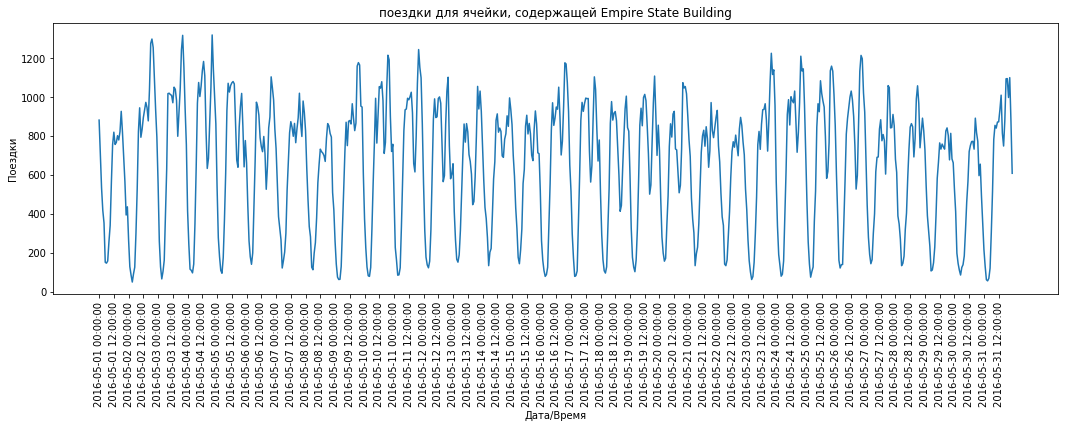

In [175]:
trips = np.array(row_empire_state_building.iloc[0, 5:])
hours = list(range(len(trips)))
labels = row_empire_state_building.columns[5:]
plt.figure(figsize=(18, 5))
plt.plot(hours, trips)
plt.xlabel(u'Дата/Время')
plt.xticks(hours[::12], labels[::12], rotation='vertical')
plt.ylabel(u'Поездки')
plt.title('поездки для ячейки, содержащей Empire State Building')
plt.show()

<p>6. Посчитайте, сколько в мае 2016 было пар час-ячейка, для которых не было совершено ни одной поездки.</p>

In [199]:
data = regions[regions.columns[5:]].values
data.size - np.count_nonzero(data)

1718238